In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.rcParams["figure.figsize"] = (10, 8)
plt.rcParams.update({'font.size': 20})

In [3]:
quality_name_map = {
    "crowdlab": "CROWDLAB",
    "label_quality_score": "Label Quality Score",
    "agreement": "Agreement",
    "active_label_cleaning": "Active Label Cleaning",
    "empirical_bayes": "Empirical Bayes",
    "no_perannotator_weights": "No Perannotator Weights",
    "dawid_skene": "Dawid-Skene",
    "glad": "GLAD",
    "dawid_skene_with_model": "Dawid-Skene with Model",
    "glad_with_model": "GLAD with Model"
}

consensus_name_map = {
    "majority": "Majority Vote (Agreement)",
    "dawid_skene": "Dawid-Skene",
    "glad": "GLAD",
    "dawid_skene_with_model": "Dawid-Skene with Model",
    "glad_with_model": "GLAD with Model",
    "crowdlab": "CROWDLAB"
}

In [4]:
results = pd.read_csv("benchmark_results/results.csv")
results = results[results["model"] == "truelabels"]

results_qual_score = results[(results["consensus_method"] != "crowdlab") & (results["quality_method"] != "no_perannotator_weights")][
        [
            "dataset",
            "model",
            "quality_method",
            "consensus_quality_auroc",
            "consensus_quality_auprc", 
            "annotator_quality_spearman_corr"
        ]
    ]

results_accuracy = results[
        [
            "dataset",
            "model",
            "consensus_method",
            "consensus_labels_accuracy",
        ]
    ].drop_duplicates(ignore_index=True)

results_qual_score["quality_method"] = results_qual_score["quality_method"].apply(lambda s: quality_name_map[s])
results_accuracy["consensus_method"] = results_accuracy["consensus_method"].apply(lambda s: consensus_name_map[s])

In [5]:
qual_score_order = {
    "Agreement": 0,
    "Dawid-Skene": 1,
    "GLAD": 2,
    "Dawid-Skene with Model": 3,
    "GLAD with Model": 4,
    "Empirical Bayes": 5,
    "Active Label Cleaning": 6,
    "Label Quality Score": 7,
    "CROWDLAB": 8
}

In [6]:
worst_qual_score = results_qual_score[results_qual_score["dataset"] == "worst_annotators"].sort_values("quality_method", key=lambda s: s.map(qual_score_order))
uniform_qual_score = results_qual_score[results_qual_score["dataset"] == "uniform_1_5"].sort_values("quality_method", key=lambda s: s.map(qual_score_order))
complete_qual_score = results_qual_score[results_qual_score["dataset"] == "complete"].sort_values("quality_method", key=lambda s: s.map(qual_score_order))

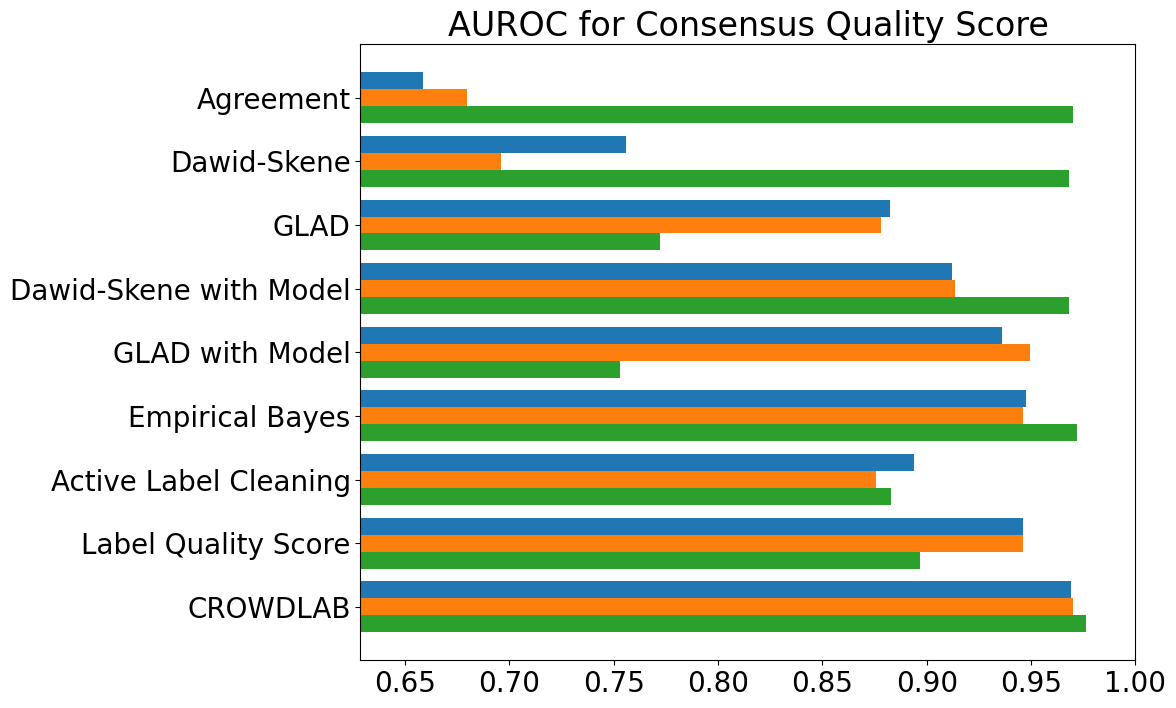

In [7]:
x = np.arange(len(worst_qual_score["quality_method"]) * 1.5 - 1.5, -1.5, -1.5)
width = 0.4 # the width of the bars

plt.barh(x + width, worst_qual_score["consensus_quality_auroc"], width, label="Worst Annotators") 
plt.barh(x, uniform_qual_score["consensus_quality_auroc"], width, label="Uniform 1-5") 
plt.barh(x - width, complete_qual_score["consensus_quality_auroc"], width, label="Complete") 

plt.xlim(np.min(worst_qual_score["consensus_quality_auroc"]) - 0.03, min(np.max(complete_qual_score["consensus_quality_auroc"]) + 0.03, 1))
plt.yticks(x, worst_qual_score["quality_method"])
plt.title("AUROC for Consensus Quality Score")

plt.savefig('benchmark_graphs/auroc_truelabels.png', bbox_inches = "tight")  
plt.savefig('benchmark_graphs/auroc_truelabels.pdf', bbox_inches = "tight")

plt.show()

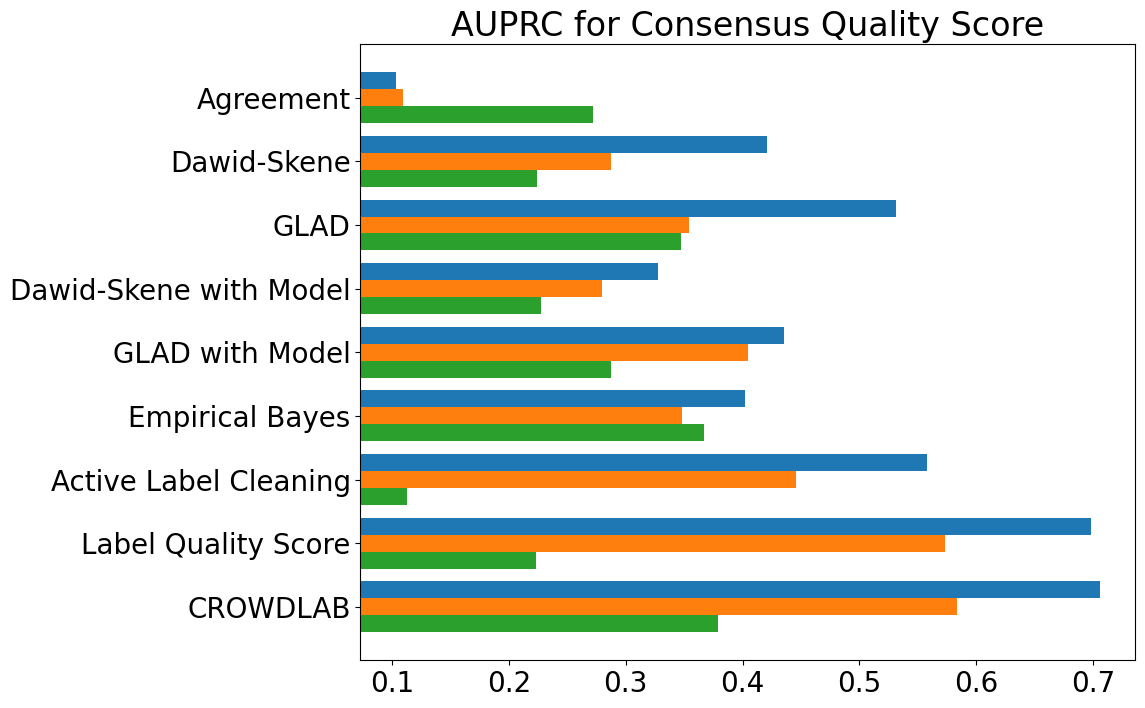

In [8]:
x = np.arange(len(worst_qual_score["quality_method"]) * 1.5 - 1.5, -1.5, -1.5)
width = 0.4 # the width of the bars

plt.barh(x + width, worst_qual_score["consensus_quality_auprc"], width, label="Worst Annotators") 
plt.barh(x, uniform_qual_score["consensus_quality_auprc"], width, label="Uniform 1-5") 
plt.barh(x - width, complete_qual_score["consensus_quality_auprc"], width, label="Complete") 

plt.xlim(np.min(worst_qual_score["consensus_quality_auprc"]) - 0.03, min(np.max(worst_qual_score["consensus_quality_auprc"]) + 0.03, 1))
plt.yticks(x, worst_qual_score["quality_method"])
plt.title("AUPRC for Consensus Quality Score")

plt.savefig('benchmark_graphs/auprc_truelabels.png', bbox_inches = "tight")  
plt.savefig('benchmark_graphs/auprc_truelabels.pdf', bbox_inches = "tight") 

plt.show()

In [9]:
worst_qual_score = worst_qual_score[(worst_qual_score["quality_method"] != "Active Label Cleaning") & (worst_qual_score["quality_method"] != "Empirical Bayes")]
uniform_qual_score = uniform_qual_score[(uniform_qual_score["quality_method"] != "Active Label Cleaning") & (uniform_qual_score["quality_method"] != "Empirical Bayes")]
complete_qual_score = complete_qual_score[(complete_qual_score["quality_method"] != "Active Label Cleaning") & (complete_qual_score["quality_method"] != "Empirical Bayes")]

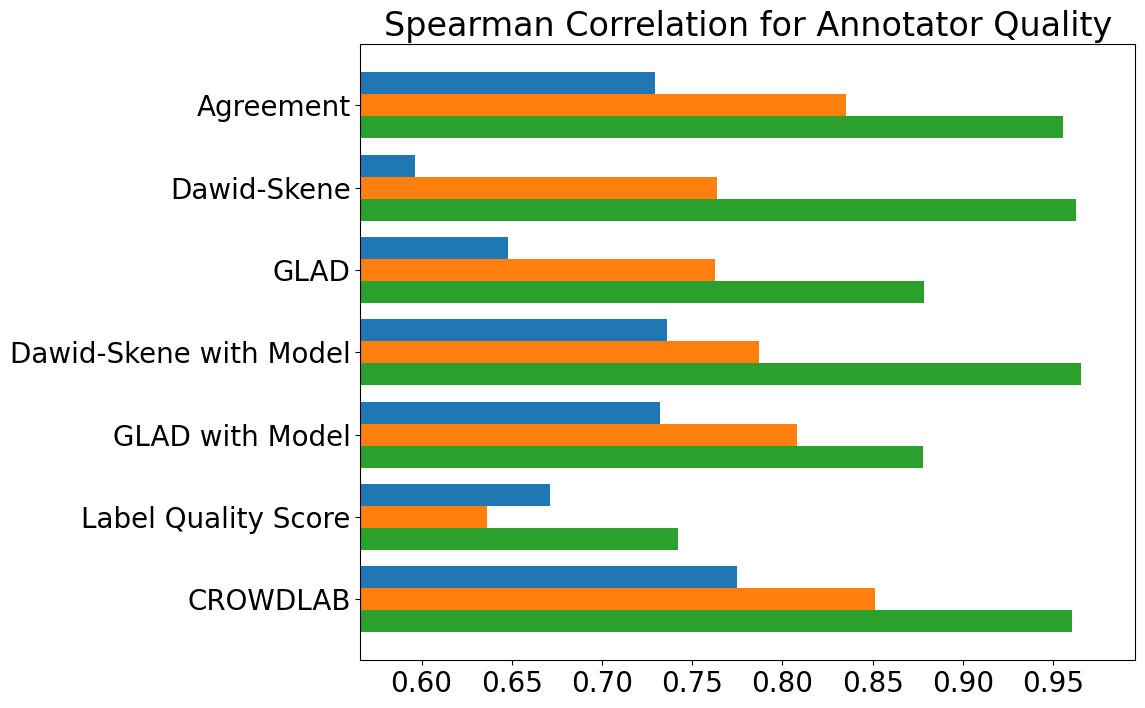

In [10]:
x = np.arange(len(worst_qual_score["quality_method"]) * 1.5 - 1.5, -1.5, -1.5)
width = 0.4 # the width of the bars

plt.barh(x + width, worst_qual_score["annotator_quality_spearman_corr"], width, label="Worst Annotators") 
plt.barh(x, uniform_qual_score["annotator_quality_spearman_corr"], width, label="Uniform 1-5") 
plt.barh(x - width, complete_qual_score["annotator_quality_spearman_corr"], width, label="Complete") 

plt.xlim(np.min(worst_qual_score["annotator_quality_spearman_corr"]) - 0.03, min(np.max(complete_qual_score["annotator_quality_spearman_corr"]) + 0.03, 1))
plt.yticks(x, worst_qual_score["quality_method"])
plt.title("Spearman Correlation for Annotator Quality")

plt.savefig('benchmark_graphs/spearman_truelabels.png', bbox_inches = "tight")  
plt.savefig('benchmark_graphs/spearman_truelabels.pdf', bbox_inches = "tight")  

plt.show()

In [11]:
accuracy_order = {
    "Majority Vote (Agreement)": 0,
    "Dawid-Skene": 1,
    "GLAD": 2,
    "Dawid-Skene with Model": 3,
    "GLAD with Model": 4,
    "CROWDLAB": 5
}

In [12]:
worst_accuracy = results_accuracy[results_accuracy["dataset"] == "worst_annotators"].sort_values("consensus_method", key=lambda s: s.map(accuracy_order))
uniform_accuracy = results_accuracy[results_accuracy["dataset"] == "uniform_1_5"].sort_values("consensus_method", key=lambda s: s.map(accuracy_order))
complete_accuracy = results_accuracy[results_accuracy["dataset"] == "complete"].sort_values("consensus_method", key=lambda s: s.map(accuracy_order))

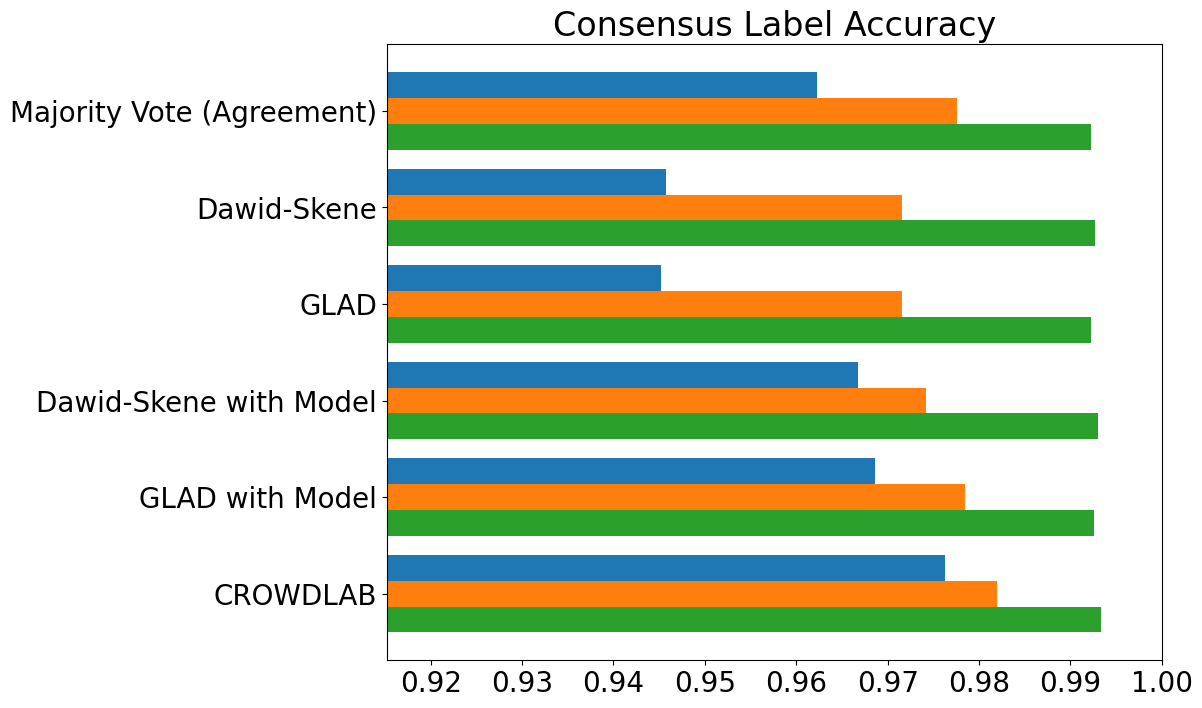

In [13]:
x = np.arange(len(worst_accuracy["consensus_method"]) * 1.5 - 1.5, -1.5, -1.5)
width = 0.4 # the width of the bars

plt.barh(x + width, worst_accuracy["consensus_labels_accuracy"], width, label="Worst Annotators") 
plt.barh(x, uniform_accuracy["consensus_labels_accuracy"], width, label="Uniform 1-5") 
plt.barh(x - width, complete_accuracy["consensus_labels_accuracy"], width, label="Complete") 

plt.xlim(np.min(worst_accuracy["consensus_labels_accuracy"]) - 0.03, min(np.max(complete_accuracy["consensus_labels_accuracy"]) + 0.03, 1))
plt.yticks(x, worst_accuracy["consensus_method"])
plt.title("Consensus Label Accuracy")

plt.savefig('benchmark_graphs/accuracy_truelabels.png', bbox_inches = "tight")  
plt.savefig('benchmark_graphs/accuracy_truelabels.pdf', bbox_inches = "tight")  


plt.show()

In [14]:
%%capture 

fig = plt.figure("Line plot")
legend_fig = plt.figure("Legend plot")
ax = fig.add_subplot()

worst = ax.barh(x + width/2, worst_accuracy["consensus_labels_accuracy"], width) 
uniform = ax.barh(x - width/2, uniform_accuracy["consensus_labels_accuracy"], width) 
complete = ax.barh(x - width/2, complete_accuracy["consensus_labels_accuracy"], width) 

legend_fig.legend([worst, uniform, complete], ["Hardest", "Uniform", "Complete"], loc="center")

legend_fig.set_size_inches(4, 1.5)
legend_fig.savefig("benchmark_graphs/legend_truelabels.pdf")
legend_fig.savefig("benchmark_graphs/legend_truelabels.png")

In [15]:
%%capture 

fig = plt.figure("Line plot")
legend_fig = plt.figure("Legend plot")
ax = fig.add_subplot()

worst = ax.barh(x + width/2, worst_accuracy["consensus_labels_accuracy"], width) 
uniform = ax.barh(x - width/2, uniform_accuracy["consensus_labels_accuracy"], width) 
complete = ax.barh(x - width/2, complete_accuracy["consensus_labels_accuracy"], width) 

legend_fig.legend([worst, uniform, complete], ["Hardest", "Uniform", "Complete"], loc="center", ncol=3)

legend_fig.set_size_inches(8, 0.75)
legend_fig.savefig("benchmark_graphs/legend_truelabels_wide.pdf")
legend_fig.savefig("benchmark_graphs/legend_truelabels_wide.png")